# Difusividad Espectral

## Bibliotecas

In [1]:
import matplotlib.pyplot as plt
import scienceplots
import seaborn as sns
import pandas as pd
import numpy as np

## Opciones de graficación
Estética de las gráficas

In [2]:
sns.set_context("paper", font_scale = 1.5)
plt.style.use(["science", "grid"])

## Funciones

In [3]:
def dmas(a, b, freq, norma):
    arcotan = np.arctan(-2 * b * freq / (a ** 2))
    
    cc = norma * np.cos(arcotan)
    dd = norma * np.sin(arcotan)
    
    reg = - (2 * a * b * cc) / ((dd + a) ** 2 + cc ** 2)
    ima = - b + (2 * a * b * (dd + a)) / ((dd + a) ** 2 + cc ** 2)
    
    return reg, ima

In [4]:
def imas(a, b, freq, norma):
    arcotan = np.arctan((2 * b * freq / (a ** 2)) + np.pi)
    
    cc = norma * np.cos(arcotan)
    dd = norma * np.sin(arcotan)
    
    reg = - (2 * a * b * cc) / ((dd - a) ** 2 + cc ** 2)
    ima = b + (2 * a * b * (dd - a)) / ((dd - a) ** 2 + cc ** 2)
    
    return reg, ima

In [5]:
def dmenos(a, b, freq, norma):
    arcotan = np.arctan((-2 * b * freq / (a ** 2)) + np.pi)
    
    cc = norma * np.cos(arcotan)
    dd = norma * np.sin(arcotan)
    
    reg = (2 * a * b * cc) / ((dd - a) ** 2 + cc ** 2)
    ima = - b + (2 * a * b * (a - dd)) / ((dd - a) ** 2 + cc ** 2)
    
    return reg, ima

In [6]:
def imenos(a, b, freq, norma):
    arcotan = np.arctan((2 * b * freq / (a ** 2)))
    
    cc = norma * np.cos(arcotan)
    dd = norma * np.sin(arcotan)
    
    reg = (2 * a * b * cc) / ((dd + a) ** 2 + cc ** 2)
    ima = b - (2 * a * b * (a + dd)) / ((dd + a) ** 2 + cc ** 2)
    
    return reg, ima

## Archivos

In [7]:
frecuencias = np.loadtxt("datos/frecuencias_linea.csv")
nf = frecuencias.size
nf

721

In [8]:
exponentes = np.loadtxt("datos/exponente_linea.csv").astype(int)
nexp = exponentes.size
nexp

4

## Listas de $A$ y $B$

In [9]:
lista_a = np.array([-0.480, -0.482, -0.452, -0.485])
lista_b = np.array([0.113, 0.455, 0.582, 0.691])


In [10]:
regamadmas = np.empty((nexp, nf))
imgamadmas = np.empty((nexp, nf))

regamaimas = np.empty((nexp, nf))
imgamaimas = np.empty((nexp, nf))

regamadmenos = np.empty((nexp, nf))
imgamadmenos = np.empty((nexp, nf))

regamaimenos = np.empty((nexp, nf))
imgamaimenos = np.empty((nexp, nf))

for e in range(nexp):
    a = lista_a[e]
    b = lista_b[e]
    
    norma = ((a ** 4) + (16 * (b ** 2) * (frecuencias ** 2))) ** 0.25
    
    regamadmas[e], imgamadmas[e] = dmas(a, b, frecuencias, norma)
    regamaimas[e], imgamaimas[e] = imas(a, b, frecuencias, norma)
    regamadmenos[e], imgamaimenos[e] = dmenos(a, b, frecuencias, norma)
    regamaimenos[e], imgamaimenos[e] = imenos(a, b, frecuencias, norma)

In [11]:
datos = np.abs(np.abs(imgamadmas) + np.abs(imgamadmenos) - np.abs(imgamaimas) - np.abs(imgamaimenos))

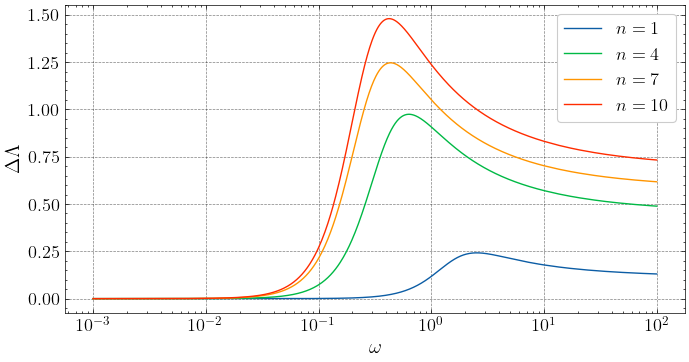

In [12]:
plt.figure(figsize = (8, 4))
plt.xlabel("$\omega$")
plt.ylabel("$\Delta \Lambda$")
plt.xscale("log")
for e in range(exponentes.size):
    plt.plot(frecuencias, datos[e], label = f"$n = {exponentes[e]}$")
plt.legend(loc = "best")
plt.savefig("graficas/difusividad_espectral_linea.pdf", dpi = 300, bbox_inches = "tight")
plt.show()